In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [270]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.21.5
1.4.4
0.11.2


# Problem 1

Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

You as an analyst have been tasked with performing a thorough analysis of the data and coming up with insights to improve the marketing campaign.

# A)  What is the important technical information about the dataset that a database administrator would be interested in? (Hint: Information about the size of the dataset and the nature of the variables)


In [271]:
df=pd.read_csv('austo_automobile+%282%29+%281%29.csv')

The top 5 records of the dataset are as follows:

In [272]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


The botton 5 records of the dataset are as follows:

In [273]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


In [274]:
print("no. of rows:", df.shape[0], "\n""no. of columns:", df.shape[1])

no. of rows: 1581 
no. of columns: 14


Retrieving the list of fields along with their data type

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [276]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

# Observations
-Data has been loaded into the pandas dataframe

-There are 1581 rows and 14 columns

-There are 6 numerical and 8 categorical variables present

-We have observed that Gender and Partner_salary variables have some null values. Total null values in Gender = 53 Total null values in Partner_salary=106

# B. Take a critical look at the data and do a preliminary analysis of the variables. Do a quality check of the data so that the variables are consistent. Are there any discrepancies present in the data? If yes, perform preliminary treatment of data

Checking the Null values

In [277]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

-Total Null Values in Gender= 53,
-Total Null values in Partner_salary=106

Handling the Null Values

In [278]:
df['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [279]:
df.rename(columns={"Femle":"Female"}, inplace=True)
df['Gender'].replace('Femle','Female', inplace=True)
df['Gender'].replace('Femal','Female', inplace=True)
df['Gender'].replace(np.nan,'Male', inplace=True)
df

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback


In [280]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [281]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['Partner_salary'] =imputer.fit_transform(df[['Partner_salary']])

In [282]:
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

The Null values in the above dataset has been removed successfully

Separating the numerical and the categorical fields of the dataset

In [283]:
df_num = df.select_dtypes(['float64','int64'])
df_cat = df.select_dtypes(['object'])

Numerical Summarization of the dataset is as follows:

In [353]:
df_num.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,20225.559322,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,18905.183912,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,24900.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38000.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


# Inspecting the duplicates

In [285]:
# Are there any dulicates
dups = df.duplicated()
print('No of duplicate rows= %d' % (dups.sum()))
# df[dups]

No of duplicate rows= 0


# Checking the skewness and kurtosis of the dataset

In [286]:
print("skeness of Price is", df['Price'].skew())
print("kurtosis of Price is ", df['Price']. kurtosis() )

skeness of Price is 0.7408739566673956
kurtosis of Price is  -0.570647541022121


In [287]:
print("skeness of Total_salary is", df['Total_salary'].skew())
print("kurtosis of Total_salary is ", df['Total_salary']. kurtosis() )

skeness of Total_salary is 0.6097056414760922
kurtosis of Total_salary is  0.6477311703314852


In [288]:
print("skeness of Partner_salary is", df['Partner_salary'].skew())
print("kurtosis of Partner_salary is ", df['Partner_salary']. kurtosis() )

skeness of Partner_salary is 0.3501743752324361
kurtosis of Partner_salary is  -0.7423310982184774


In [289]:
print("skeness of Salary is", df['Salary'].skew())
print("kurtosis of Salary is ", df['Salary']. kurtosis() )

skeness of Salary is -0.011570808595835032
kurtosis of Salary is  -0.5120638956726791


In [290]:
print("skewness of Age is", df['Age'].skew())
print("kurtosis of Age is ", df['Age']. kurtosis() )

skewness of Age is 0.8930870865867485
kurtosis of Age is  -0.24405428996418044


In [291]:
print("skeness of No_of_Dependents is", df['No_of_Dependents'].skew())
print("kurtosis of No_of_Dependents is ", df['No_of_Dependents']. kurtosis() )

skeness of No_of_Dependents is -0.1298080480109239
kurtosis of No_of_Dependents is  -0.5442892631277538


 We have observed that theSkewness and Kurtosis of the dataset ranges from -1 to +1 thus it is normal distribution 

# Observations:-
1) We have observed from the above dataset that the minimum age is 22 years whereas the maximum age is 54years and the average age is 29 years with the positively skewness 0.89 and kurtosis -0.24  

2) We have observed from the above dataset that the minimum No_of_dependents is 0 whereas the maximum No_of_dependents is 4 and the average No_of_dependents is 2 with the negatively skewness -0.12 and kurtosis -0.54

3)We have observed from the above dataset that the minimum Salary is 30k whereas the maximum Salaryts is 99k and the average Salary is 51k with the  skewness very cloase to 0

4)We have observed from the above dataset that the minimum Total_salary is 30k whereas the maximum Total_salary is 171k and the average Total_salary is 60k with the  skewness are kurtosis is almost equal

We have observed from the above dataset that the minimum price of automobile is 18k whereas the maximum price of automobile is 70k and the average price of automobile is 25k with the moderate  skewness of 0.74

Categorical Summarization of the dataset is as follows:

In [292]:
df_cat.describe().T

,count,unique,top,freq
Gender,1581,2,Male,1252
Profession,1581,2,Salaried,896
Marital_status,1581,2,Married,1443
Education,1581,2,Post Graduate,985
Personal_loan,1581,2,Yes,792
House_loan,1581,2,No,1054
Partner_working,1581,2,Yes,868
Make,1581,3,Sedan,702


# Checking for anomalous values in categorical values

In [293]:
df['Gender'].value_counts()

Male      1252
Female     329
Name: Gender, dtype: int64

In [294]:
df['Profession'].value_counts() 

Salaried    896
Business    685
Name: Profession, dtype: int64

In [295]:
df['Marital_status'].value_counts() 

Married    1443
Single      138
Name: Marital_status, dtype: int64

In [296]:
df['Education'].value_counts()

Post Graduate    985
Graduate         596
Name: Education, dtype: int64

In [297]:
df['No_of_Dependents'].value_counts() 

3    557
2    557
1    229
4    218
0     20
Name: No_of_Dependents, dtype: int64

In [298]:
df['Personal_loan'].value_counts()

Yes    792
No     789
Name: Personal_loan, dtype: int64

In [299]:
df['House_loan'].value_counts()

No     1054
Yes     527
Name: House_loan, dtype: int64

In [300]:
df['Partner_working'].value_counts()

Yes    868
No     713
Name: Partner_working, dtype: int64

In [301]:
df['Make'].value_counts()

Sedan        702
Hatchback    582
SUV          297
Name: Make, dtype: int64

From the value counts it is observed that the categorical fields are free from anomalies

Now Inspecting the anomalies as follows:

<AxesSubplot:xlabel='Price'>

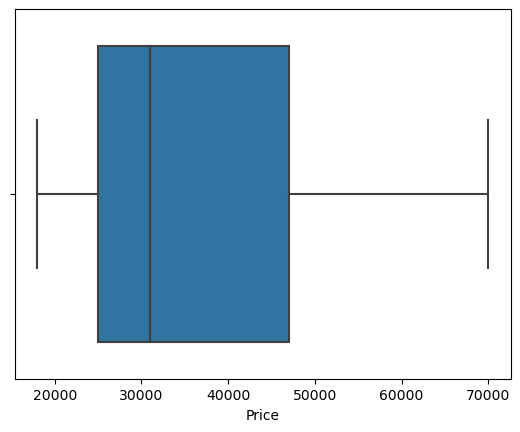

In [302]:
sns.boxplot(x=df.Price)

<AxesSubplot:xlabel='Total_salary'>

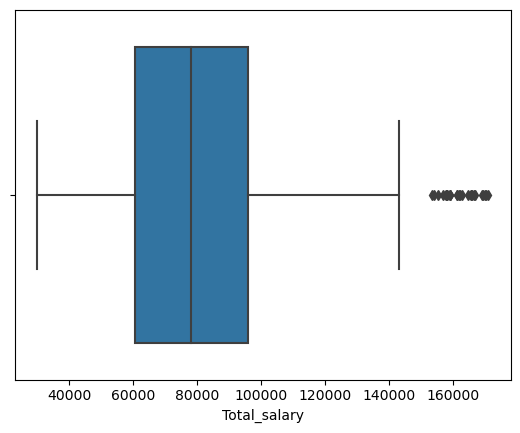

In [303]:
sns.boxplot(x=df.Total_salary)

<AxesSubplot:xlabel='Partner_salary'>

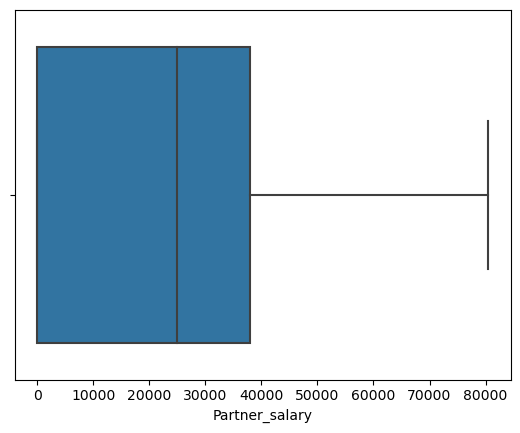

In [304]:
sns.boxplot(x=df.Partner_salary)

<AxesSubplot:xlabel='Salary'>

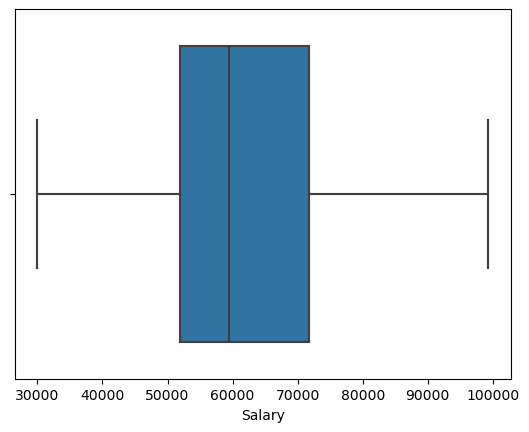

In [305]:
sns.boxplot(x=df.Salary)

<AxesSubplot:xlabel='Age'>

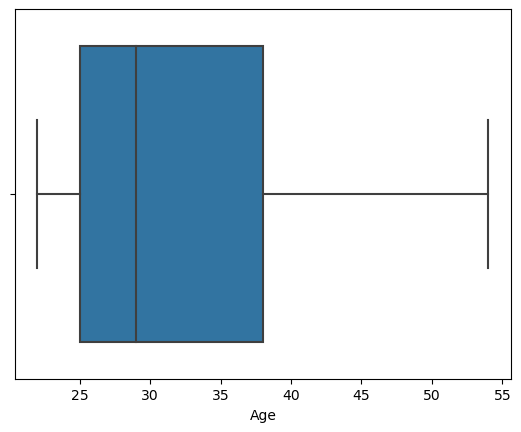

In [306]:
sns.boxplot(x=df.Age)

1)From the above boxplots it is observed that there are no negative values present in the numerical fields

2)Outliers are present in the Total_salary

Now Outliers are treated by using the IQR method

In [307]:
 # Take a backup of referral_current_salary field as 2 other fields to compare output from different methods
df['Total_salary1'] = df['Total_salary']  
df['Total_salary2'] = df['Total_salary']

In [308]:
df.Total_salary.describe()

count      1581.000000
mean      79625.996205
std       25545.857768
min       30000.000000
25%       60500.000000
50%       78000.000000
75%       95900.000000
max      171000.000000
Name: Total_salary, dtype: float64

In [309]:
percentile25 = df['Total_salary1'].quantile(0.25)
percentile75 = df['Total_salary1'].quantile(0.75)

In [310]:
percentile75

95900.0

In [311]:
percentile25

60500.0

In [312]:
iqr=percentile75-percentile25
iqr

35400.0

In [313]:
upper_limit=percentile75+1.5*iqr
upper_limit

149000.0

In [314]:
lower_limit=percentile25-1.5*iqr
lower_limit

7400.0

In [315]:
df[df['Total_salary1']>upper_limit]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,Total_salary1,Total_salary2
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.000000,170000,61000,SUV,170000,170000
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.000000,165800,61000,SUV,165800,165800
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.000000,158000,57000,SUV,158000,158000
17,49,Female,Salaried,Married,Post Graduate,4,No,No,Yes,95100,70600.000000,165700,64000,SUV,165700,165700
18,49,Female,Business,Married,Post Graduate,3,No,No,Yes,92600,70300.000000,162900,58000,SUV,162900,162900
19,49,Male,Salaried,Married,Post Graduate,3,Yes,No,Yes,98400,60600.000000,159000,54000,SUV,159000,159000
29,46,Female,Salaried,Married,Post Graduate,2,No,No,Yes,98300,70700.000000,169000,61000,SUV,169000,169000
30,46,Male,Salaried,Married,Post Graduate,4,No,No,Yes,94900,70700.000000,165600,67000,SUV,165600,165600
31,46,Male,Business,Married,Graduate,2,Yes,No,Yes,91100,70000.000000,161100,66000,SUV,161100,161100
41,53,Female,Salaried,Married,Post Graduate,4,No,No,Yes,96600,70300.000000,166900,66000,SUV,166900,166900


In [316]:
df[df['Total_salary1']<upper_limit]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,Total_salary1,Total_salary2
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.000000,142800,61000,SUV,142800,142800
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.000000,139900,57000,SUV,139900,139900
5,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,79800,60500.000000,140300,57000,SUV,140300,140300
6,53,Female,Salaried,Married,Post Graduate,3,Yes,No,Yes,80900,50800.000000,131700,51000,SUV,131700,131700
7,52,Male,Salaried,Married,Graduate,4,No,No,Yes,79100,40400.000000,119500,68000,SUV,119500,119500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.000000,33300,27000,Hatchback,33300,33300
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,20225.559322,32000,31000,Hatchback,32000,32000
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.000000,32900,30000,Hatchback,32900,32900
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,20225.559322,32200,24000,Hatchback,32200,32200


In [317]:
new_df=df[df['Total_salary1']<upper_limit]

In [318]:
new_df.shape

(1554, 16)

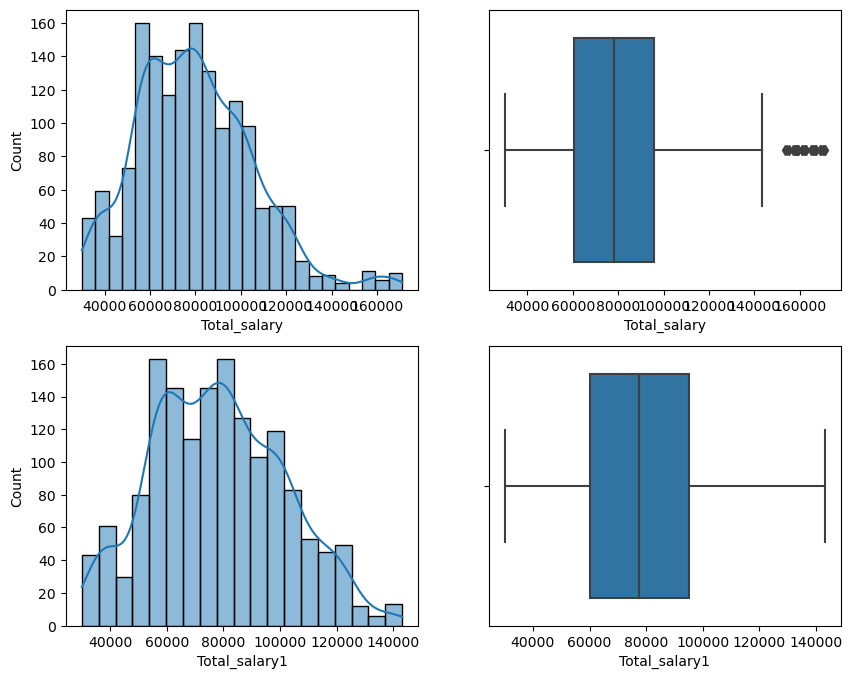

In [319]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
sns.histplot(df['Total_salary'], kde=True, ax=axes[0][0])
sns.boxplot(x='Total_salary', data=df, ax=axes[0][1])
sns.histplot(new_df['Total_salary1'], kde=True, ax=axes[1][0])
sns.boxplot(x='Total_salary1', data=new_df, ax=axes[1][1])
plt.show()

From the above graph it is clearn that outliers of the Total_salary has been treated 

# C. Explore all the features of the data separately by using appropriate visualizations and draw insights that can be utilized by the business.

# Univariate analysis of numerical Values

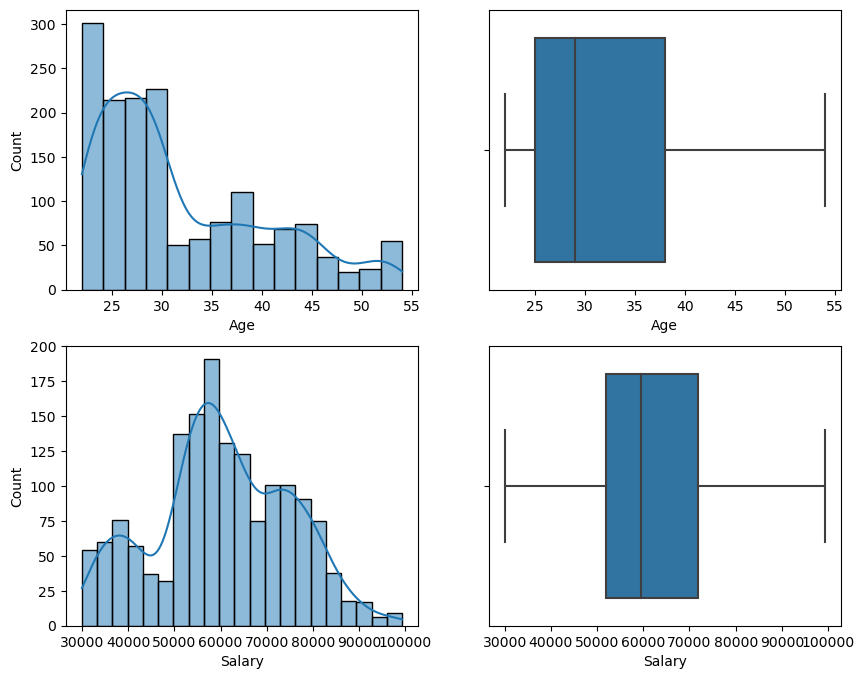

In [320]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
sns.histplot(df['Age'], kde=True, ax=axes[0][0])
sns.boxplot(x='Age', data=df, ax=axes[0][1])
sns.histplot(df['Salary'], kde=True, ax=axes[1][0])
sns.boxplot(x='Salary', data=df, ax=axes[1][1])
plt.show()

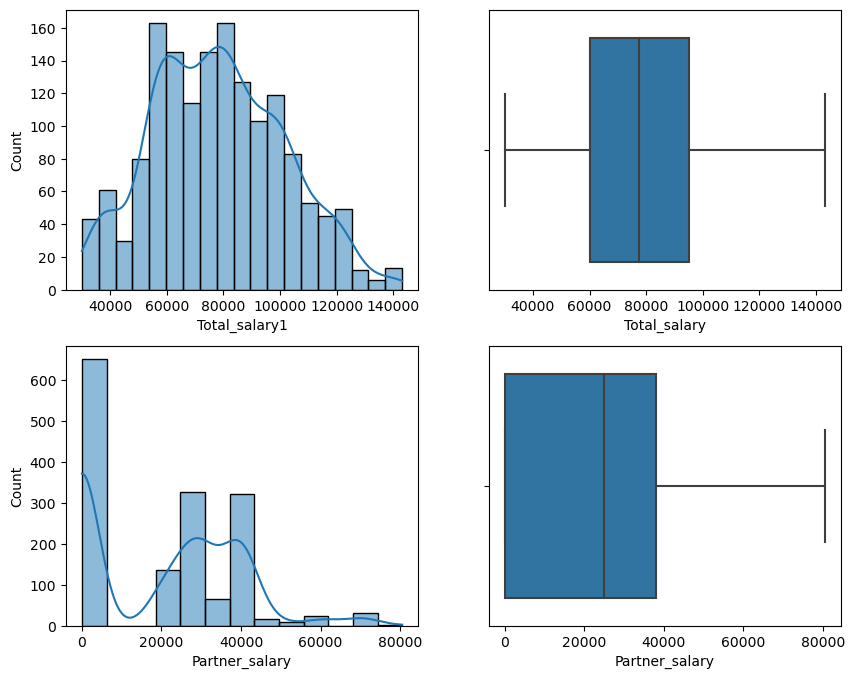

In [321]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
sns.histplot(new_df['Total_salary1'], kde=True, ax=axes[0][0])
sns.boxplot(x='Total_salary', data=new_df, ax=axes[0][1])
sns.histplot(df['Partner_salary'], kde=True, ax=axes[1][0])
sns.boxplot(x='Partner_salary', data=df, ax=axes[1][1])
plt.show()

# Insights
From the univariate analysis of the numerical fields we have observed following things:-
1) Age of customer seems to be multimodal distribution generally lies betwen 25 years to 40 years

2) Salary seems to be in the range 50k to 70k with multimodal distribution

3)The skewness of the Total_salary seems to be reduced and it ranges 60k to 100k

4) Partner-salary lies between 0k to 40k

# Univariate analysis of Categorical Values

<AxesSubplot:xlabel='Gender', ylabel='count'>

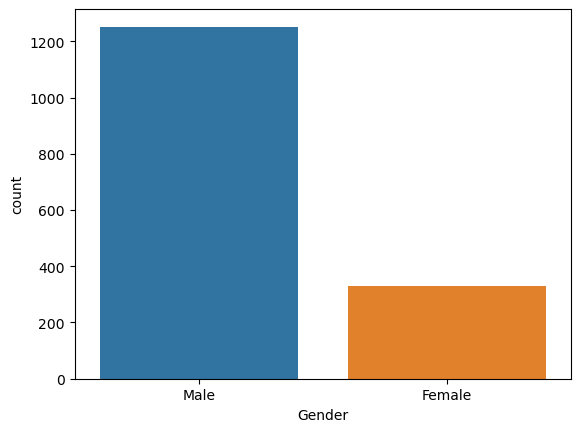

In [322]:
sns.countplot(x='Gender', data=df)

<AxesSubplot:xlabel='Profession', ylabel='count'>

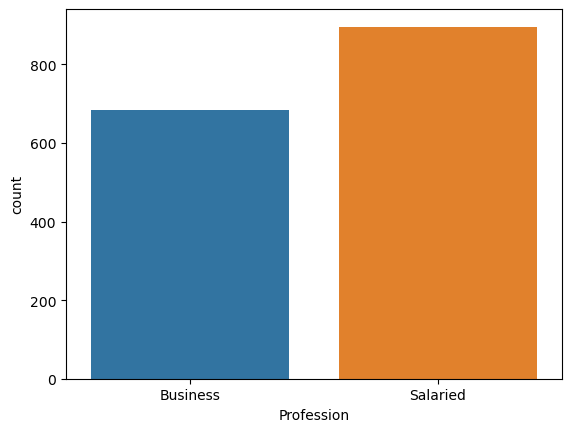

In [323]:
sns.countplot(x='Profession', data=df)

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

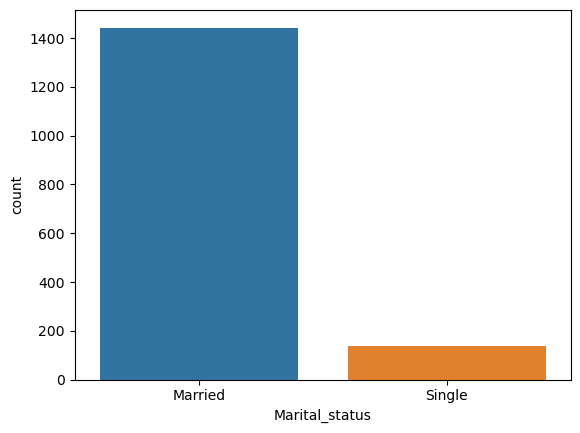

In [324]:
sns.countplot(x='Marital_status', data=df)

<AxesSubplot:xlabel='Education', ylabel='count'>

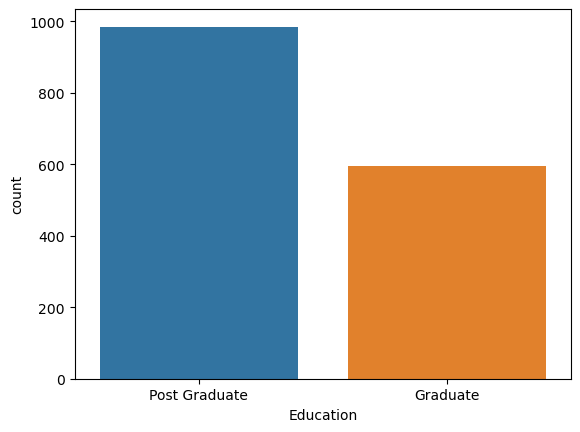

In [325]:
sns.countplot(x='Education', data=df)

<AxesSubplot:xlabel='Personal_loan', ylabel='count'>

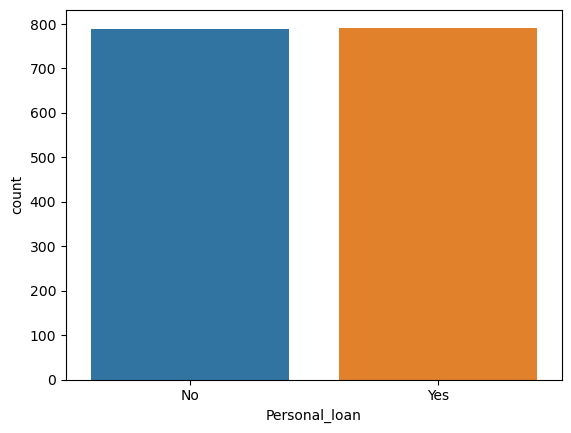

In [326]:
sns.countplot(x='Personal_loan', data=df)

<AxesSubplot:xlabel='House_loan', ylabel='count'>

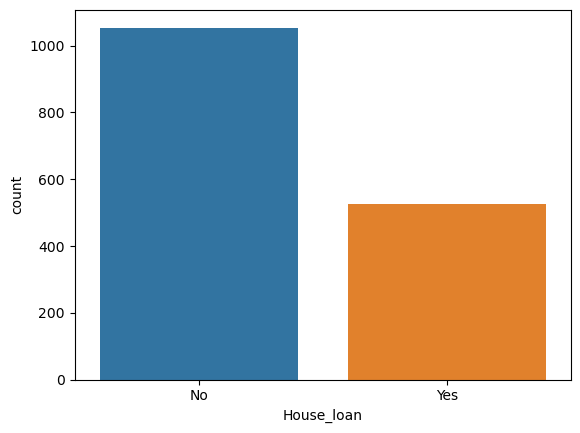

In [327]:
sns.countplot(x='House_loan', data=df)

<AxesSubplot:xlabel='No_of_Dependents', ylabel='count'>

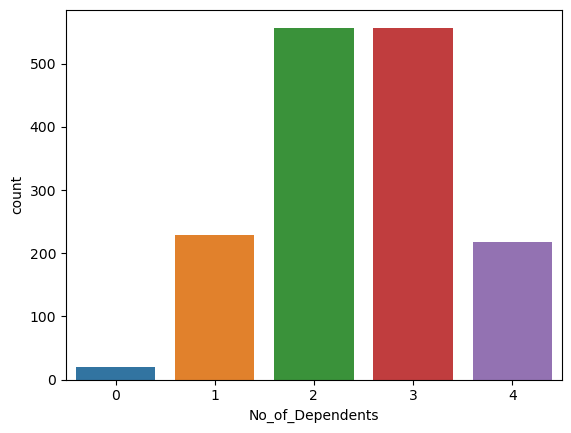

In [328]:
sns.countplot(x='No_of_Dependents', data=df)

<AxesSubplot:xlabel='Partner_working', ylabel='count'>

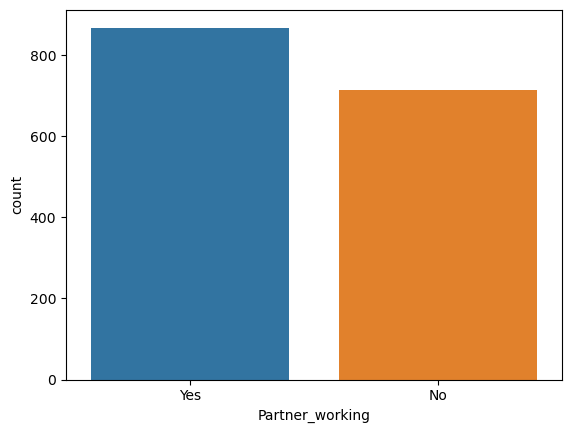

In [329]:
sns.countplot(x='Partner_working', data=df)

<AxesSubplot:xlabel='Make', ylabel='count'>

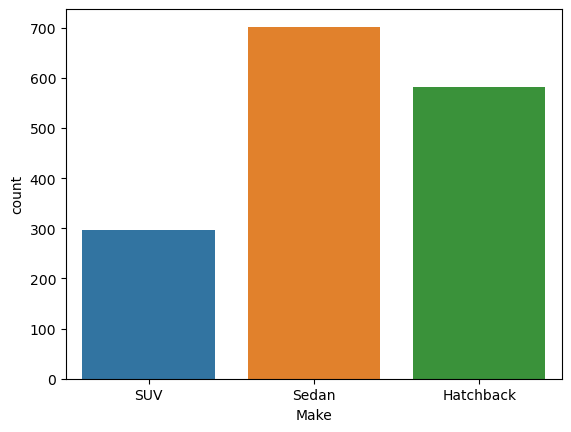

In [330]:
sns.countplot(x='Make', data=df)

# Insights

1) Male customers are higher than female customers

2) Salaried customers are slightly higher than business cutomers

3) Married customers are higher than single customers

4)Post graduate customers are having higher majority

5) majority of customers preferred Sedan than Hatchback than SUV

6)From the graph we have observed than there is a slight difference between customers working and non working


# D) Understanding the relationships among the variables in the dataset is crucial for every analytical project. Perform analysis on the data fields to gain deeper insights. Comment on your understanding of the data. 

# Bivariate analysis of Numerical vs Numerical value

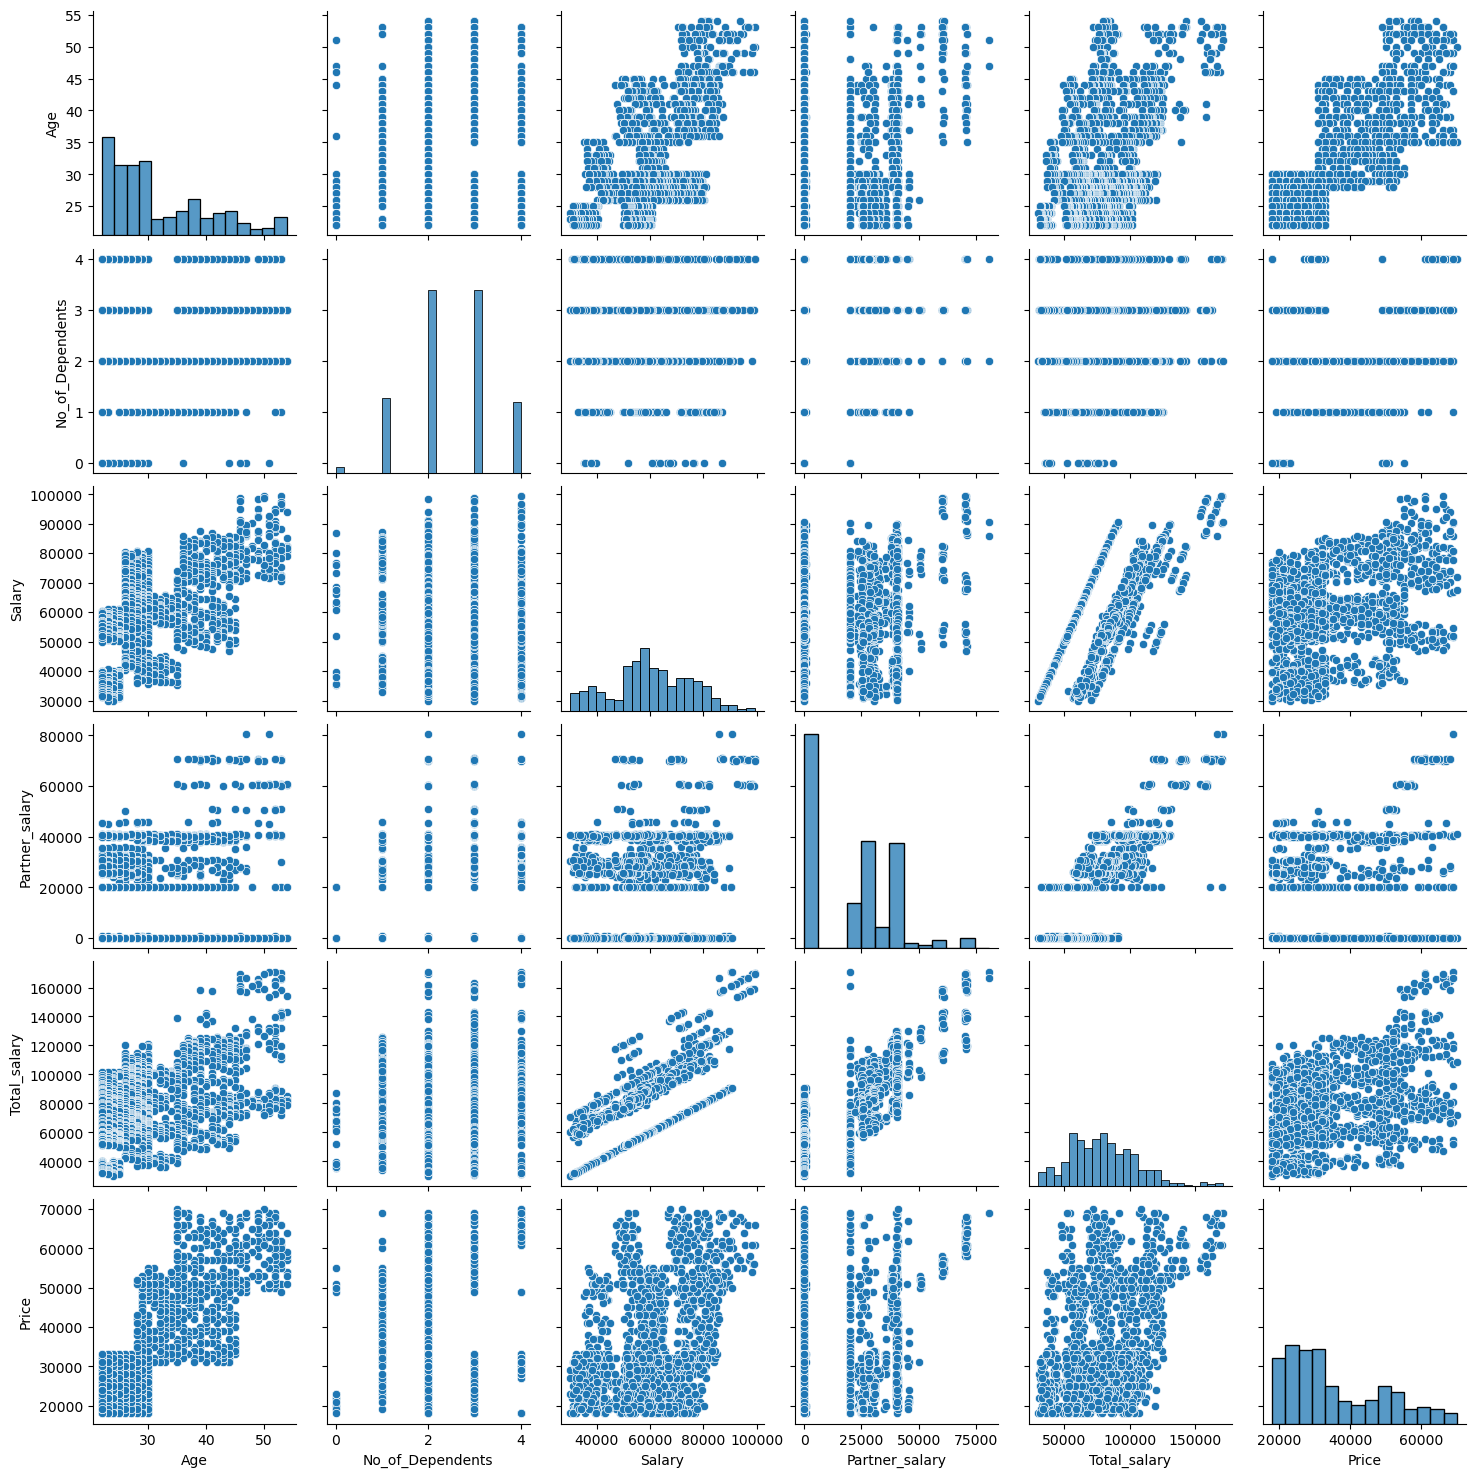

In [331]:
sns.pairplot(df_num)

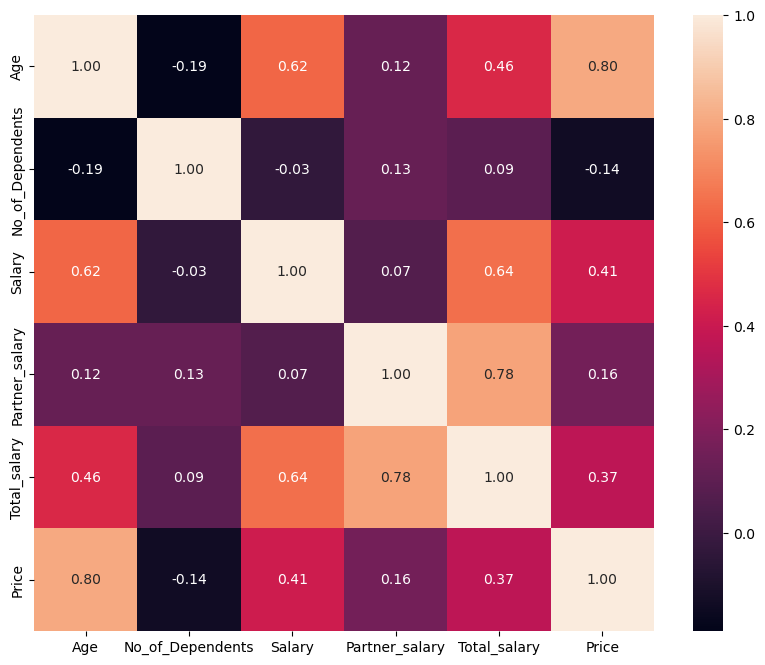

In [332]:
plt.figure(figsize=(10,8))
sns.heatmap(df_num.corr(),annot=True, fmt=".2f");

# Insights
1) High correlation exists between Price & Age, Tota_salary & Age and Salary & Age

2)There is no linear relationship exits among variables

# Bivariate analysis of Categorical vs Categorical value

<AxesSubplot:xlabel='Make', ylabel='count'>

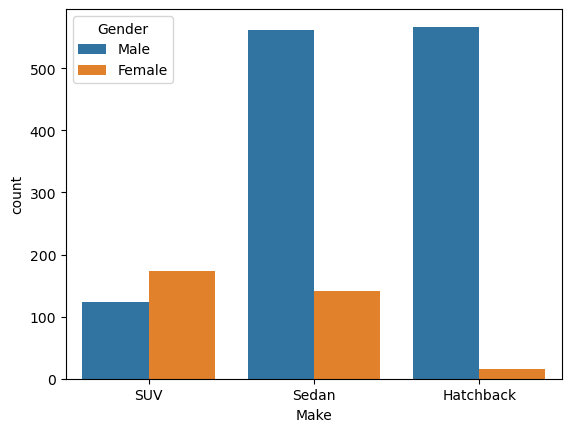

In [333]:
sns.countplot(x='Make', hue='Gender', data=df)

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

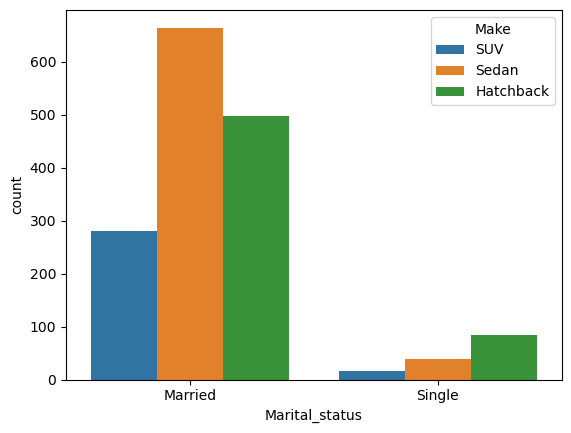

In [334]:
sns.countplot(x='Marital_status', hue='Make', data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

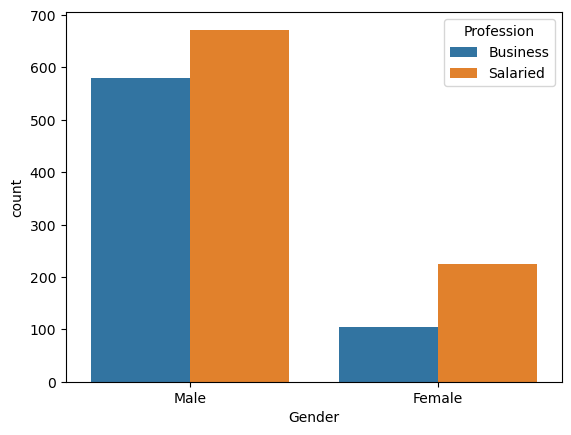

In [335]:
sns.countplot(x='Gender', hue='Profession', data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

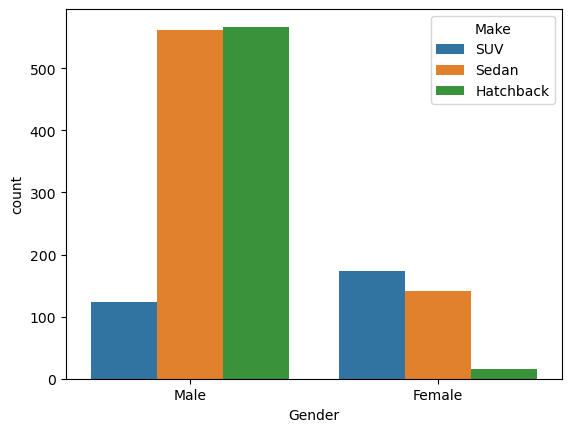

In [336]:
sns.countplot(x='Gender', hue='Make', data=df)

# Insights

1) It is observed from the graph that male customers prefer sedan where as female customers prefer SUV

2)Married customers purchase more cars than single customers where as married customers purchase sedan slightly higher than singles where as single customers prefer hatchback

3) salaried customers purchase more car than business customers

4) Males purchase more car than females and they generally prefer sedan and hatchback

# E) Employees working on the existing marketing campaign have made the following remarks. Based on the data and your analysis state whether you agree or disagree with their observations. Justify your answer Based on the data available.

# E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”

In [337]:
df['Gender'].value_counts()

Male      1252
Female     329
Name: Gender, dtype: int64

[Text(0, 0, '124'), Text(0, 0, '173')]

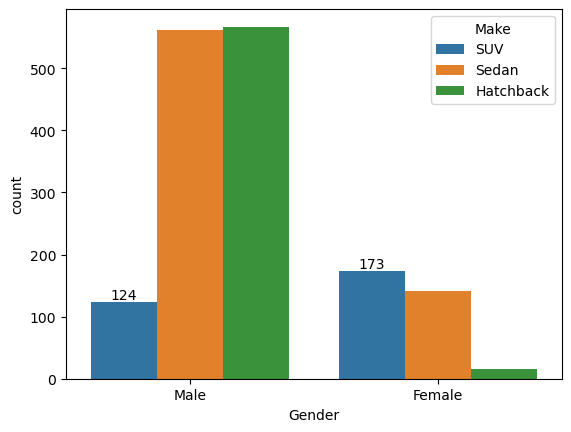

In [338]:
ax=sns.countplot(x='Gender', hue='Make', data=df)
ax.bar_label(ax.containers[0]) 
                                               

It is observed from the above graph than females prefer more SUV than male. Thus statement made by Steve Roger  is false  

# E2) Ned Stark believes that a salaried person is more likely to buy a Sedan.

Analysing the car purchased by salaried person :- 

In [339]:
df['Profession'].value_counts()

Salaried    896
Business    685
Name: Profession, dtype: int64

[Text(0, 0, '290'), Text(0, 0, '292')]

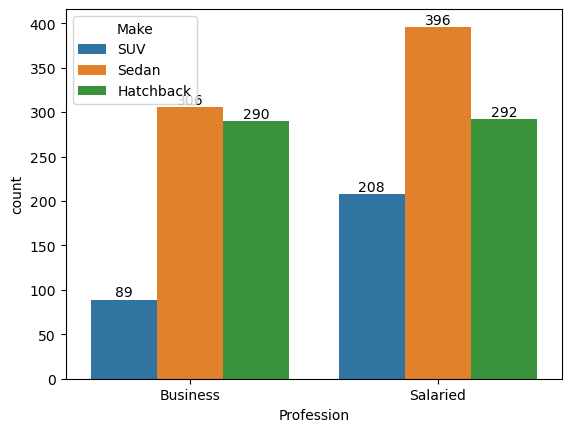

In [340]:
ax=sns.countplot(x='Profession', hue='Make', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])

From the above graph visualization we have observed that salaried person is more likely to buy a sedan.Hence statement made by Ned Stark is correct.

# E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.

Analysing the Total car purchased by salaried male customer are as follows:

In [341]:
cat_col = df[['Profession','Gender','Make']]

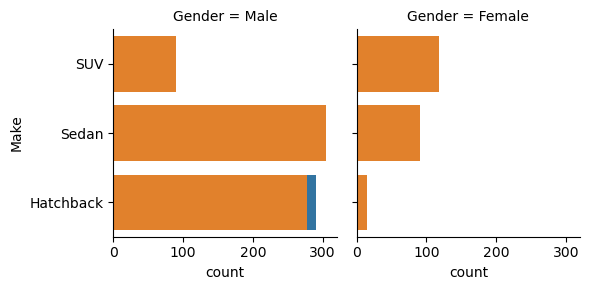

In [342]:
ax =sns.FacetGrid(df, col ='Gender', hue ='Profession')
ax.map_dataframe(sns.countplot, y ='Make')

In [343]:
cat_col.value_counts()

Profession  Gender  Make     
Salaried    Male    Sedan        305
Business    Male    Hatchback    290
Salaried    Male    Hatchback    277
Business    Male    Sedan        256
Salaried    Female  SUV          118
                    Sedan         91
            Male    SUV           90
Business    Female  SUV           55
                    Sedan         50
            Male    SUV           34
Salaried    Female  Hatchback     15
dtype: int64

From the visualization of the above graph we have observed that salaried male prefer sedan over SUV. Hence statement made by Sheldon is false

# F. From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a Business can utilize the results from this exercise. Give justification along with presenting metrics/charts used for arriving at the conclusions.

Give justification along with presenting metrics/charts used for arriving at the conclusions.

# F1) Gender
 

In [344]:
df.groupby('Gender').agg({'Price':['mean','median']})

Price         
                mean   median
Gender                       
Female  47705.167173  49000.0
Male    32416.134185  29000.0

In [ ]:
From the above calculation it is clear that females are more likely to buy than males

# F2) Personal_loan

In [346]:
df.groupby('Personal_loan').agg({'Price':['mean','median']})

Price         
                       mean   median
Personal_loan                       
No             36742.712294  32000.0
Yes            34457.070707  31000.0

It is observed from the above table that the purchase made by customers who have personal loan is slightly higher

# G. From the current data set comment if having a working partner leads to the purchase of a higher-priced car.

In [213]:
df.groupby('Partner_working').agg({'Price':['mean','median']})

Price         
                         mean   median
Partner_working                       
No               36000.000000  31000.0
Yes              35267.281106  31000.0

From the above calculation we have observed that mean and median value for partner working is same thus we can say that partner working has no impact on purchasing car

# H.) The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital_status - fields to arrive at groups with similar purchase history.

In [230]:
cat_col1 = df[['Marital_status','Gender','Make']]

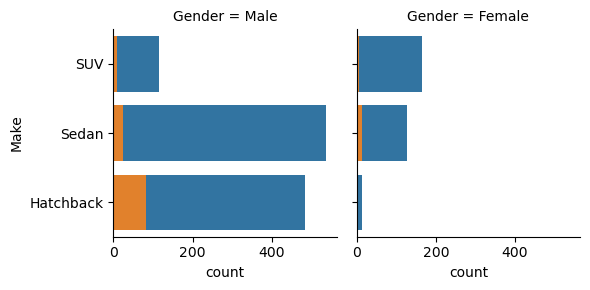

In [240]:
ax =sns.FacetGrid(df, col ='Gender', hue ='Marital_status')
ax.map_dataframe(sns.countplot, y ='Make')

In [231]:
cat_col1.value_counts()

Marital_status  Gender  Make     
Married         Male    Sedan        537
                        Hatchback    484
                Female  SUV          166
                        Sedan        127
                Male    SUV          115
Single          Male    Hatchback     83
                        Sedan         24
Married         Female  Hatchback     14
Single          Female  Sedan         14
                Male    SUV            9
                Female  SUV            7
                        Hatchback      1
dtype: int64

From the above visualization we have observed married female prefers SUV where as married male prefers sedan similary single female prefers sedan where as single male prefers  hatchback 

# Problem 2

A bank can generate revenue in a variety of ways, such as charging interest, transaction fees and financial advice. Interest charged on the capital that the bank lends out to customers has historically been the most significant method of revenue generation. The bank earns profits from the difference between the interest rates it pays on deposits and other sources of funds, and the interest rates it charges on the loans it gives out.

GODIGT Bank is a mid-sized private bank that deals in all kinds of banking products, such as savings accounts, current accounts, investment products, etc. among other offerings. The bank also cross-sells asset products to its existing customers through personal loans, auto loans, business loans, etc., and to do so they use various communication methods including cold calling, e-mails, recommendations on the net banking, mobile banking, etc.

GODIGT Bank also has a set of customers who were given credit cards based on risk policy and customer category class but due to huge competition in the credit card market, the bank is observing high attrition in credit card spending. The bank makes money only if customers spend more on credit cards. Given the attrition, the Bank wants to revisit its credit card policy and make sure that the card given to the customer is the right credit card. The bank will make a profit only through the customers that show higher intent towards a recommended credit card. (Higher intent means consumers would want to use the card and hence not be attrite.)


 

# Problem 2 Question: ( Analyze the dataset and list down the top 5 important variables, along with the business justifications. (10 Points)

In [243]:
df1=pd.read_excel('godigt_cc_data.xlsx')

In [244]:
df1.head()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [245]:
df1.tail()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
8443,8444,4262 41XX XXXX XXXX,426241,Visa,chartered,2010-01-10,A,1,1,1,...,47,0,0,0,0,0,T,108713,0,970000
8444,8445,37691 6XXXX XXXXX,376916,Amex,centurion,2006-07-19,A,0,1,1,...,52,0,0,0,0,0,T,42369,Salaried,200000
8445,8446,4375 51XX XXXX XXXX,437551,Visa,rewards,2006-02-15,D,0,1,1,...,36,0,0,0,0,0,T,8459,Retired,90000
8446,8447,4477 47XX XXXX XXXX,447747,Visa,indianoil,2003-11-06,C,0,0,0,...,54,1,0,0,0,0,T,57100,Salaried,210000
8447,8448,4262 41XX XXXX XXXX,426241,Visa,rewards,2013-01-13,D,0,1,1,...,37,0,0,0,0,0,T,45244,Retired,130000


In [246]:
print("no. of rows:", df.shape[0], "\n""no. of columns:", df.shape[1])

no. of rows: 8448 
no. of columns: 28


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

 # Top 5 important variables, along with the business justifications

# cc_limit

Credit card limit is basically a Risk Management practice used by the banks to reduce the number of bad loans. This is calculated based on the customer's income, their CIBIL score etc.



# avg_spends_l3m

It helps in identify how frequently customer use the credit card and also identify if the customer faces any issue  

# cc_active30 
CC_Active30 provides the information regarding customer's credit card usage frequency. If the credit card is not used frequently, bank can reach out to the customer with new deals and offers. Also if customer is facing issues in using the credit card then they can help the customer with their concerns

# annual_income_at_source
Annual income provides an insight into the purchasing capacity of the customer and is a very crucial information. When making decisions related to risks involved, offers to send to a customer, loan limit for the customer etc. correct information related to the Annual income can make a big difference

# T+12_month_activity
It play very crucial role for bank. It helps bank to identify the areas where customer is more interested to use credit cards and the areas where customer uses less credit card. With this information bank can focus on areas where credit card is less use and can attract customers by giving various offers etc to increase its profitability  